In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from itertools import cycle


In [ ]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/mid-term/'
list_of_files = os.listdir(location)

Mounted at /content/drive


In [ ]:
conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []

In [ ]:
df_X= pd.read_excel(location+'X.xlsx', header=None)

In [ ]:
df_Y= pd.read_excel(location+'Y.xlsx', header=None)

In [ ]:
data = pd.concat([df_X, df_Y], axis=1)
data = data.set_axis([*data.columns[:-1], 15], axis=1, inplace=False)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.137700,-0.78326,-0.728210,-1.30810,0.712410,-1.154600,-1.21720,1.74920,0.60935,-1.37700,-1.30780,-0.697440,-1.066900,1.86660,-1.035400,1
1,-0.937030,-0.16375,0.325450,-1.16010,0.133970,-0.930570,-1.11390,1.22920,0.52222,-0.87295,-1.15980,-0.258450,-1.041400,2.01890,-0.953480,1
2,-0.878820,-1.03170,-0.740390,-1.00300,0.572470,-0.788810,-0.94716,1.76390,0.96157,-0.58891,-1.00280,-0.074423,-0.662550,1.31660,-0.833500,1
3,-0.813280,-0.47618,-0.013790,-0.92353,0.804550,-0.810350,-0.90316,1.71100,0.72966,-0.69230,-0.92341,-0.618610,-0.783370,0.94421,-0.805560,1
4,-0.493300,-0.63534,0.296550,-0.31032,-0.308820,-0.224400,-0.43386,-0.59472,0.84042,0.29545,-0.30986,-0.347410,-0.355760,0.48155,-0.517340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.054207,-1.81270,-0.973140,1.11780,-0.947310,0.651730,0.64308,-0.42405,-1.63370,2.22520,1.11860,1.538200,0.439100,-0.64874,0.362700,3
2396,1.769000,1.12270,1.114000,1.40530,-1.348900,1.226100,1.58440,-0.80974,-1.34840,1.04950,1.40520,1.778900,1.064400,-1.27920,1.652900,3
2397,0.417130,1.10070,-0.015029,0.28898,-0.844170,-0.022917,0.35184,-0.17578,-0.73266,-0.32947,0.28812,-0.991580,0.080629,-1.19740,-0.031375,3
2398,1.505100,1.13910,0.992910,1.27110,-1.583700,0.844720,1.39090,-1.03520,-0.70006,0.71376,1.27160,0.218680,0.886720,-1.48770,1.296200,3


In [ ]:
def calc_accuracy(matrix):
    total = sum(sum(matrix))
    accuracy = (matrix[0,0]+matrix[1,1]+matrix[2,2])/total
    return accuracy

def f_sensitivity_class_1(matrix):
    sensitivity1 = matrix[0,0]/(matrix[0,0]+matrix[1,0]+matrix[2,0])
    return sensitivity1

def f_specificity_class_1(matrix):
    specificity1 = (matrix[1,1]+matrix[2,1]+matrix[1,2]+matrix[2,2])/(matrix[1,1]+matrix[2,1]+matrix[1,2]+matrix[2,2] +matrix[1,0]+matrix[2,0])
    return specificity1

def f_sensitivity_class_2(matrix):
    sensitivity2 = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
    return sensitivity2

def f_specificity_class_2(matrix):
    specificity2 = (matrix[0,0]+matrix[0,2]+matrix[2,0]+matrix[2,2])/(matrix[0,1]+matrix[2,1]+matrix[0,0]+matrix[0,2]+matrix[2,0]+matrix[2,2])
    return specificity2

def f_sensitivity_class_3(matrix):
    sensitivity3 = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
    return sensitivity3

def f_specificity_class_3(matrix):
    specificity3 = (matrix[0,0]+matrix[0,1]+matrix[1,0] +matrix[1,1])/(matrix[0,2]+matrix[1,2]+matrix[0,0]+matrix[0,1]+matrix[1,0] +matrix[1,1])
    return specificity3

def f_precision_1(matrix):
    precision1 = matrix[0,0]/(matrix[1,0]+matrix[2,0]+matrix[0,0])
    return precision1

def f_precision_2(matrix):
    precision2 = matrix[1,1]/(matrix[1,1]+matrix[0,1]+matrix[2,1])
    return precision2

def f_precision_3(matrix):
    precision3 = matrix[2,2]/(matrix[2,2]+matrix[0,2]+matrix[1,2])
    return precision3

def f_fpr_1(matrix):
    fpr1 = (matrix[1,0]+matrix[2,0])/(matrix[1,0]+matrix[2,0]+matrix[1,1]+matrix[2,1]+matrix[1,2]+matrix[2,2])
    return fpr1

def f_fpr_2(matrix):
    fpr2 = (matrix[0,1]+matrix[2,1])/(matrix[0,1]+matrix[2,1]+matrix[0,0]+matrix[2,0]+matrix[0,2]+matrix[2,2])
    return fpr2

def f_fpr_3(matrix):
    fpr3 = (matrix[0,2]+matrix[1,2])/(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1]+matrix[0,2]+matrix[1,2])
    return fpr3

def f_fnr_1(matrix):
    fnr1 = (matrix[0,1]+matrix[0,2])/(matrix[0,1]+matrix[0,2]+matrix[0,0])
    return fnr1

def f_fnr_2(matrix):
    fnr2 = (matrix[1,0]+matrix[1,2])/(matrix[1,1]+matrix[1,0]+matrix[1,2])
    return fnr2

def f_fnr_3(matrix):
    fnr3 = (matrix[2,0]+matrix[2,1])/(matrix[2,2]+matrix[2,0]+matrix[2,1])
    return fnr3

def plot(x, classifier):
    m=np.arange(1,16)
    plt.plot(m,x, '-ok', color='black');
    plt.title("Classifier: "+ classifier)
    plt.xlabel("Features",fontsize=18)
    plt.ylabel("accuracy",fontsize=18)
    plt.show()

def f_cm_from_max_accuracy(max_list_accracy):
  cm = conf_matrix_list_of_arrays.get(max(max_list_accracy, key=max_list_accracy.get))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  print("************************sensitivity*********************")
  print(f_sensitivity_class_1(cm))
  print(f_specificity_class_1(cm))
  print(f_sensitivity_class_2(cm))

  print("*******************specificity********************")
  print(f_specificity_class_2(cm))
  print(f_sensitivity_class_3(cm))
  print(f_specificity_class_3(cm))

  # precision
  p1 = f_precision_1(cm)
  p2 = f_precision_2(cm)
  p3 = f_precision_3(cm)

  print("************precision**********************")

  print(p1)
  print(p2)
  print(p3)

  s1 = f_sensitivity_class_1(cm)
  s2 = f_sensitivity_class_2(cm)
  s3 = f_sensitivity_class_3(cm)

  #f1_score
  f1_1 = (2*p1*s1)/(p1+s1)
  f1_2 = (2*p2*s2)/(p2+s2)
  f1_3 = (2*p3*s3)/(p3+s3)
  print("****************************f1_score*****************")
  print(f1_1)
  print(f1_2)
  print(f1_3)

  #fpr
  print("*************************fpr*****************")
  print(f_fpr_1(cm))
  print(f_fpr_2(cm))
  print(f_fpr_3(cm))

  #fnr
  print("******************fnr*********************")
  print(f_fnr_1(cm))
  print(f_fnr_2(cm))
  print(f_fnr_3(cm))

  print("******************accuracy********************")
  print(calc_accuracy(cm))

  return disp


In [ ]:
train, test = train_test_split(data, test_size = 0.2, train_size = 0.8)

X_train = train.iloc[:, 0:15].values
y_train = train.iloc[:, [15]].values
X_test = test.iloc[:, 0:15].values
y_test = test.iloc[:, [15]].values

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=111)

Naive Bayes classifier

In [ ]:
conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []
dic_accuracy = {}
model = GaussianNB()

for i in range(1,16):

  for index, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):

    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    #train
    model.fit(X_tr[:, 0:i], y_tr.ravel())

    #validation
    y_pred= model.predict(X_te[:, 0:i])
    accuracy_score(y_te, y_pred)

    #test
    y_pred_X_test= model.predict(X_test[:, 0:i])
    accura = accuracy_score(y_test, y_pred_X_test)

    ac.append(accura)
    list_acc[str(i) + "_" + str(index)] = accura

    cm = confusion_matrix(y_test, y_pred_X_test)
    conf_matrix_list_of_arrays[str(i) + "_" + str(index)] = cm

In [ ]:
# list_acc

In [ ]:
print(list_acc.get(max(list_acc, key=list_acc.get)))

0.9145833333333333


In [ ]:
max(list_acc, key=list_acc.get)

'14_1'

In [ ]:
max_accuracy_nb = []
for x in range(0, len(ac), 10):
  max_accuracy_nb.append(max(ac[x:x+10]))

In [ ]:
max_accuracy_nb

[0.8770833333333333,
 0.8875,
 0.8875,
 0.9083333333333333,
 0.8979166666666667,
 0.90625,
 0.9083333333333333,
 0.9083333333333333,
 0.90625,
 0.90625,
 0.9041666666666667,
 0.9125,
 0.90625,
 0.9145833333333333,
 0.90625]

<ipython-input-8-b3edb40e5616>:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,x, '-ok', color='black');


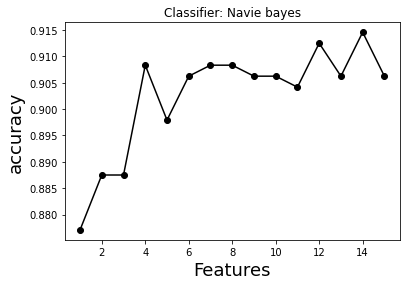

In [ ]:
plot(max_accuracy_nb, "Navie bayes")

************************sensitivity*********************
0.8734177215189873
0.9376947040498442
0.9125
*******************specificity********************
0.95
0.9627329192546584
0.9843260188087775
************precision**********************
0.8734177215189873
0.9012345679012346
0.96875
****************************f1_score*****************
0.8734177215189873
0.9068322981366459
0.9657320872274143
*************************fpr*****************
0.06230529595015576
0.05
0.01567398119122257
******************fnr*********************
0.1320754716981132
0.0875
0.037267080745341616
******************accuracy********************
0.9145833333333333


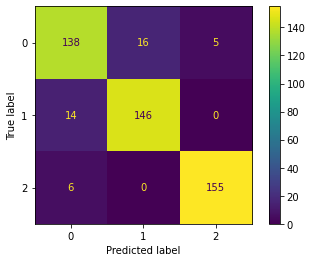

In [ ]:
disp = f_cm_from_max_accuracy(list_acc)
disp.plot()
plt.show()

 LDA *classifier*

In [ ]:
model = LinearDiscriminantAnalysis()
conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []
for i in range(1,16):

  for index, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):

    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    #train
    model.fit(X_tr[:, 0:i], y_tr.ravel())

    #validation
    y_pred= model.predict(X_te[:, 0:i])
    accuracy_score(y_te, y_pred)

    #test
    y_pred_X_test= model.predict(X_test[:, 0:i])
    accura = accuracy_score(y_test, y_pred_X_test)

    ac.append(accura)
    list_acc[str(i) + "_" + str(index)] = accura

    cm = confusion_matrix(y_test, y_pred_X_test)
    conf_matrix_list_of_arrays[str(i) + "_" + str(index)] = cm

In [ ]:
# list_acc

In [ ]:
print(list_acc.get(max(list_acc, key=list_acc.get)))

0.9145833333333333


In [ ]:
max(list_acc, key=list_acc.get)

'13_4'

In [ ]:
max_accuracy_lda = []
for x in range(0, len(ac), 10):
  max_accuracy_lda.append(max(ac[x:x+10]))

<ipython-input-8-b3edb40e5616>:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,x, '-ok', color='black');


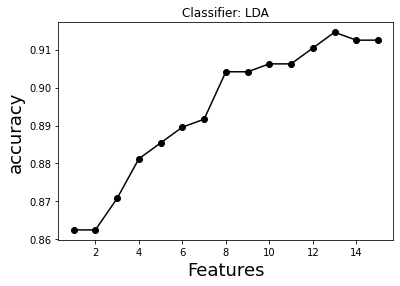

In [ ]:
plot(max_accuracy_lda, "LDA")

************************sensitivity*********************
0.8597560975609756
0.9283489096573209
0.88125
*******************specificity********************
0.95625
0.9751552795031055
0.987460815047022
************precision**********************
0.8597560975609756
0.9096774193548387
0.9751552795031055
****************************f1_score*****************
0.8597560975609756
0.8952380952380952
0.9751552795031055
*************************fpr*****************
0.07165109034267912
0.04375
0.012539184952978056
******************fnr*********************
0.11320754716981132
0.11875
0.024844720496894408
******************accuracy********************
0.9145833333333333


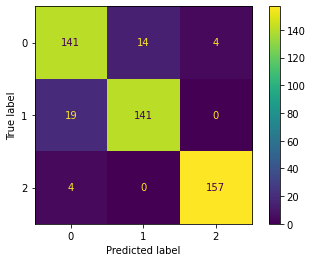

In [ ]:
disp = f_cm_from_max_accuracy(list_acc)
disp.plot()
plt.show()

***QDA*** **classifier**

In [ ]:
model = QuadraticDiscriminantAnalysis()
conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []
for i in range(1,16):

  for index, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):

    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    #train
    model.fit(X_tr[:, 0:i], y_tr.ravel())

    #validation
    y_pred= model.predict(X_te[:, 0:i])
    accuracy_score(y_te, y_pred)

    #test
    y_pred_X_test= model.predict(X_test[:, 0:i])
    accura = accuracy_score(y_test, y_pred_X_test)

    ac.append(accura)
    list_acc[str(i) + "_" + str(index)] = accura

    cm = confusion_matrix(y_test, y_pred_X_test)
    conf_matrix_list_of_arrays[str(i) + "_" + str(index)] = cm

In [ ]:
print(list_acc.get(max(list_acc, key=list_acc.get)))
max(list_acc, key=list_acc.get)

0.93125


'15_5'

<ipython-input-8-b3edb40e5616>:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,x, '-ok', color='black');


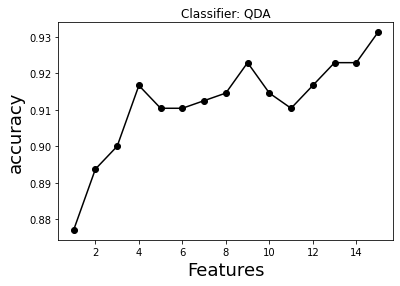

In [ ]:
max_accuracy_qda = []
for x in range(0, len(ac), 10):
  max_accuracy_qda.append(max(ac[x:x+10]))

plot(max_accuracy_qda, "QDA")

************************sensitivity*********************
0.9315068493150684
0.9688473520249221
0.9625
*******************specificity********************
0.95
0.9751552795031055
0.9780564263322884
************precision**********************
0.9315068493150684
0.9058823529411765
0.9573170731707317
****************************f1_score*****************
0.9315068493150684
0.9333333333333333
0.966153846153846
*************************fpr*****************
0.03115264797507788
0.05
0.0219435736677116
******************fnr*********************
0.14465408805031446
0.0375
0.024844720496894408
******************accuracy********************
0.93125


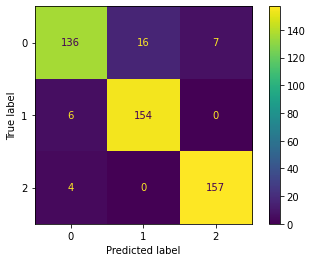

In [ ]:
disp = f_cm_from_max_accuracy(list_acc)
disp.plot()
plt.show()

Multi-layer Perceptron classifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(128,64,32), random_state=42,solver='adam')

conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []
for i in range(1,16):

  for index, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):

    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    #train
    model.fit(X_tr[:, 0:i], y_tr.ravel())

    #validation
    y_pred= model.predict(X_te[:, 0:i])
    accuracy_score(y_te, y_pred)

    #test
    y_pred_X_test= model.predict(X_test[:, 0:i])
    accura = accuracy_score(y_test, y_pred_X_test)

    ac.append(accura)
    list_acc[str(i) + "_" + str(index)] = accura

    cm = confusion_matrix(y_test, y_pred_X_test)
    conf_matrix_list_of_arrays[str(i) + "_" + str(index)] = cm


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
print(list_acc.get(max(list_acc, key=list_acc.get)))
max(list_acc, key=list_acc.get)

0.925


'10_2'

<ipython-input-8-b3edb40e5616>:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,x, '-ok', color='black');


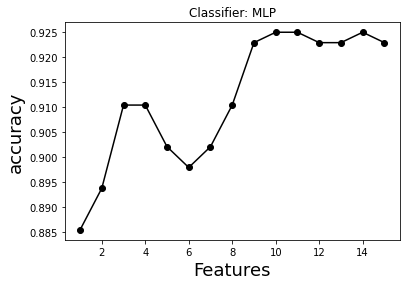

In [ ]:
max_accuracy_mlp = []
for x in range(0, len(ac), 10):
  max_accuracy_mlp.append(max(ac[x:x+10]))

plot(max_accuracy_mlp, "MLP")

************************sensitivity*********************
0.8682634730538922
0.9314641744548287
0.88125
*******************specificity********************
0.959375
0.9813664596273292
0.9968652037617555
************precision**********************
0.8682634730538922
0.9155844155844156
0.9937106918238994
****************************f1_score*****************
0.8682634730538922
0.8980891719745223
0.9874999999999999
*************************fpr*****************
0.06853582554517133
0.040625
0.003134796238244514
******************fnr*********************
0.0880503144654088
0.11875
0.018633540372670808
******************accuracy********************
0.925


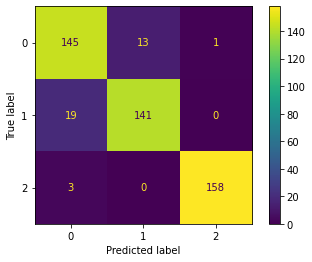

In [ ]:
disp = f_cm_from_max_accuracy(list_acc)
disp.plot()
plt.show()

Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=0)
conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []
for i in range(1,16):

  for index, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):

    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    #train
    model.fit(X_tr[:, 0:i], y_tr.ravel())

    #validation
    y_pred= model.predict(X_te[:, 0:i])
    accuracy_score(y_te, y_pred)

    #test
    y_pred_X_test= model.predict(X_test[:, 0:i])
    accura = accuracy_score(y_test, y_pred_X_test)

    ac.append(accura)
    list_acc[str(i) + "_" + str(index)] = accura

    cm = confusion_matrix(y_test, y_pred_X_test)
    conf_matrix_list_of_arrays[str(i) + "_" + str(index)] = cm

In [ ]:
print(list_acc.get(max(list_acc, key=list_acc.get)))
max(list_acc, key=list_acc.get)

0.9104166666666667


'13_7'

<ipython-input-8-b3edb40e5616>:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,x, '-ok', color='black');


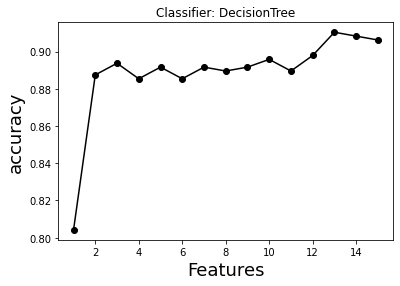

In [ ]:
max_accuracy_decision = []
for x in range(0, len(ac), 10):
  max_accuracy_decision.append(max(ac[x:x+10]))

plot(max_accuracy_decision, "DecisionTree")

************************sensitivity*********************
0.8766233766233766
0.940809968847352
0.9125
*******************specificity********************
0.928125
0.968944099378882
0.9968652037617555
************precision**********************
0.8766233766233766
0.863905325443787
0.9936305732484076
****************************f1_score*****************
0.8766233766233766
0.8875379939209725
0.9811320754716981
*************************fpr*****************
0.059190031152647975
0.071875
0.003134796238244514
******************fnr*********************
0.1509433962264151
0.0875
0.031055900621118012
******************accuracy********************
0.9104166666666667


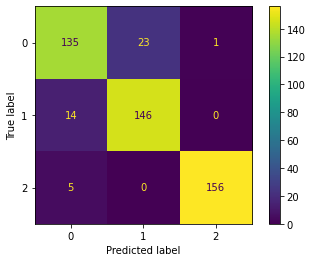

In [ ]:
disp = f_cm_from_max_accuracy(list_acc)
disp.plot()
plt.show()

Random Forest classifier

In [ ]:
model = RandomForestClassifier(n_estimators=10,  #number of tree
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced')

conf_matrix_list_of_arrays = {}
list_acc = {}
ac = []
for i in range(1,16):

  for index, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):

    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    #train
    model.fit(X_tr[:, 0:i], y_tr.ravel())

    #validation
    y_pred= model.predict(X_te[:, 0:i])
    accuracy_score(y_te, y_pred)

    #test
    y_pred_X_test= model.predict(X_test[:, 0:i])
    accura = accuracy_score(y_test, y_pred_X_test)

    ac.append(accura)
    list_acc[str(i) + "_" + str(index)] = accura

    cm = confusion_matrix(y_test, y_pred_X_test)
    conf_matrix_list_of_arrays[str(i) + "_" + str(index)] = cm



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

In [ ]:
print(list_acc.get(max(list_acc, key=list_acc.get)))
max(list_acc, key=list_acc.get)

0.91875


'15_3'

<ipython-input-8-b3edb40e5616>:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,x, '-ok', color='black');


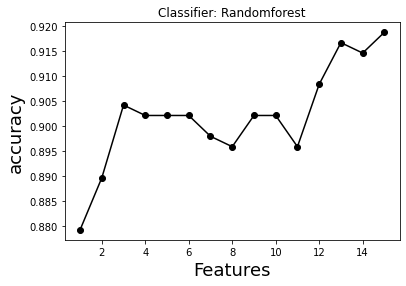

<Figure size 432x288 with 0 Axes>

In [ ]:
max_accuracy_rf = []
for x in range(0, len(ac), 10):
  max_accuracy_rf.append(max(ac[x:x+10]))

plot(max_accuracy_rf, "Randomforest")
plt.savefig('books_read.png')


************************sensitivity*********************
0.879746835443038
0.940809968847352
0.90625
*******************specificity********************
0.946875
0.9751552795031055
0.9905956112852664
************precision**********************
0.879746835443038
0.8950617283950617
0.98125
****************************f1_score*****************
0.879746835443038
0.9006211180124224
0.9781931464174455
*************************fpr*****************
0.059190031152647975
0.053125
0.009404388714733543
******************fnr*********************
0.12578616352201258
0.09375
0.024844720496894408
******************accuracy********************
0.91875


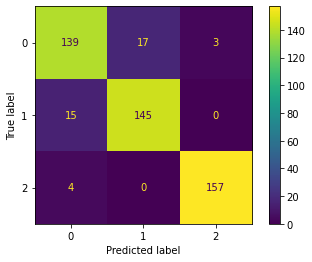

In [ ]:
disp = f_cm_from_max_accuracy(list_acc)
disp.plot()
plt.show()

In [ ]:
dict_accuracy = {
    "Naive Bayes": max_accuracy_nb,
    "LDA": max_accuracy_lda,
    "QDA": max_accuracy_qda,
    "MLP": max_accuracy_mlp,
    "Decision Tree": max_accuracy_decision,
    "Randome forest": max_accuracy_rf
}

maxd = []
def f_max(dict_accuracy):
  for k, v in dict_accuracy.items():
    i = max(v)
    j = v.index(max(v)) + 1   # as list index starts from zero and columns start from 1 to 15
    k
    maxd.append((i,j,k))
  return maxd

f_max(dict_accuracy)

[(0.9145833333333333, 14, 'Naive Bayes'),
 (0.9145833333333333, 13, 'LDA'),
 (0.93125, 15, 'QDA'),
 (0.925, 10, 'MLP'),
 (0.9104166666666667, 13, 'Decision Tree'),
 (0.91875, 15, 'Randome forest')]

In [ ]:
print(" classifier has the best performance with less number of features:", max(f_max(dict_accuracy)))

 classifier has the best performance with less number of features: (0.93125, 15, 'QDA')


In [ ]:
cycol = cycle('bgrcmk')
def plot_combined_accuracy():
    m=np.arange(1,16)
    plt.xlabel("Features",fontsize=18)
    plt.ylabel("accuracy",fontsize=18)
    plt.plot(m,max_accuracy_nb, '-ok', c=next(cycol), label="Naive Bayes");
    plt.plot(m,max_accuracy_lda, '-ok', c=next(cycol), label="LDA");
    plt.plot(m,max_accuracy_qda, '-ok', c=next(cycol), label="QDA");
    plt.plot(m,max_accuracy_mlp, '-ok', c=next(cycol), label="MLP");
    plt.plot(m,max_accuracy_decision, '-ok', c=next(cycol), label="Decision_tree");
    plt.plot(m,max_accuracy_rf, '-ok', c=next(cycol), label="Randome_Forest");
    plt.legend()
    plt.show()

<ipython-input-43-ef9340648e21>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,max_accuracy_nb, '-ok', c=next(cycol), label="Naive Bayes");
<ipython-input-43-ef9340648e21>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,max_accuracy_lda, '-ok', c=next(cycol), label="LDA");
<ipython-input-43-ef9340648e21>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,max_accuracy_qda, '-ok', c=next(cycol), label="QDA");
<ipython-input-43-ef9340648e21>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m,max_acc

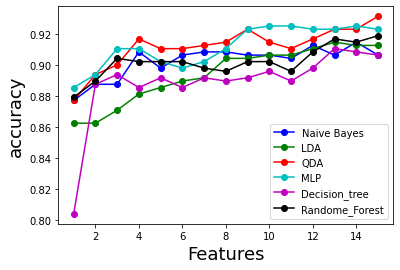

In [ ]:
plot_combined_accuracy()